# 5) Grouping

In [2]:
# Import Data
import numpy as np
import pandas as pd

# Load Palmer penguins data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Summary statistics

In [3]:
# Get the number of non-NA values in each column
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

In [5]:
# Get minimum value in each column with numerical values
penguins.select_dtypes('number').min()

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

### Grouping

In [6]:
penguins['flipper_length_mm'].mean()

200.91520467836258

In [7]:
penguins.groupby('species')['flipper_length_mm']

In [8]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [10]:
# Average flipper length per species
penguins.groupby('species')['flipper_length_mm'].mean()

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

In [11]:
# Average flipper length per species
avg_flipper = (penguins.groupby("species")
               .flipper_length_mm
               .mean()
               .rename('mean_flipper_length')
               .sort_values(ascending=False)
              )

avg_flipper

species
Gentoo       217.186992
Chinstrap    195.823529
Adelie       189.953642
Name: mean_flipper_length, dtype: float64

In [13]:
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

In [14]:
penguins.groupby(['island','year']).count()

species  bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    year                                                              
Biscoe    2007       44              44             44                 44   
          2008       64              64             64                 64   
          2009       60              59             59                 59   
Dream     2007       46              46             46                 46   
          2008       34              34             34                 34   
          2009       44              44             44                 44   
Torgersen 2007       20              19             19                 19   
          2008       16              16             16                 16   
          2009       16              16             16                 16   

                body_mass_g  sex  
island    year                    
Biscoe    2007           44   43  
          2008           64   63  
          2009           59   57  
Dream     2007           46   45  
          2008           34   34  
          2009           44   44  
Torgersen 2007           19   15  
          2008           16   16  
          2009           16   16

#### Let's say we want to plot the surveyed population per year and island. We could then use method chaining to do this:

<Axes: title={'center': 'Penguins surveyed at the Palmer Archipelago'}, ylabel='Island, Year'>

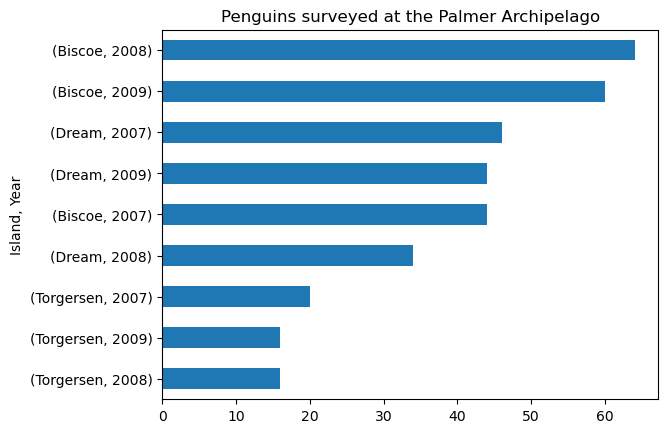

In [15]:
(penguins.groupby(['island','year'])
         .count()
         .species
         .sort_values()
         .plot(kind='barh',
                title='Penguins surveyed at the Palmer Archipelago',
                ylabel=('Island, Year'))
         )

## Check-in

#### 1) Use the `max()` method for `pandas.DataFrames` to calculate the maximum value of a penguin's body mass by year and species

In [35]:
(penguins.groupby(['year', 'species'])
         .max('body_mass_g'))

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
year species                                                                 
2007 Adelie               46.0           21.5              198.0       4675.0
     Chinstrap            58.0           20.3              201.0       4400.0
     Gentoo               59.6           17.0              230.0       6300.0
2008 Adelie               45.8           21.1              208.0       4700.0
     Chinstrap            54.2           20.8              210.0       4800.0
     Gentoo               54.3           17.3              231.0       6000.0
2009 Adelie               45.6           20.7              210.0       4775.0
     Chinstrap            55.8           19.9              212.0       4450.0
     Gentoo               55.9           17.3              230.0       6000.0

#### 2) Use (1) to display the highest body masses per year and species as a bar plot in descending order.

<Axes: title={'center': 'Highest body masses per year of Palmer Penguins'}, ylabel='Year, Species'>

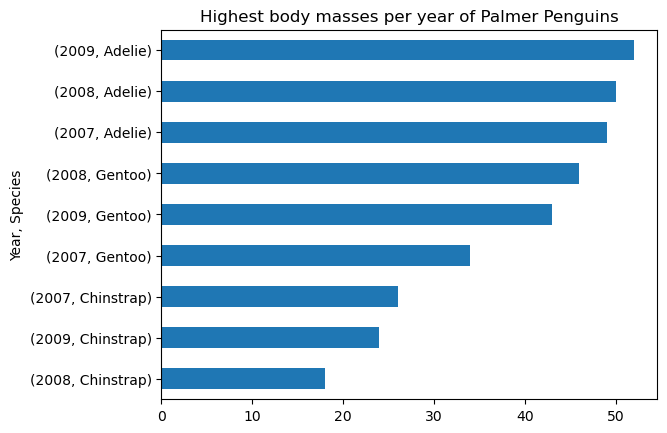

In [40]:
(penguins.groupby(['year', 'species'])
         .count()
         .body_mass_g
         .sort_values()
         .plot(kind='barh',
                title='Highest body masses per year of Palmer Penguins',
                ylabel=('Year, Species'))
         )